# Perceptron

A Perceptron is an algorithm for supervised learning of binary classifiers. This algorithm enables neurons to learn and processes elements in the training set one at a time. There are two types of Perceptrons: Single layer and Multilayer. Single layer Perceptrons can learn only linearly separable patterns.

### Perceptron Function:
Perceptron is a function that maps its input "x", which is multiplied with the learned weight coefficient; an output value "f(x)" is generated.
$$f(x) = \left\{\begin{matrix}
 +1, & w*x + b \geqslant 0 \\ 
 -1,  & w*x + b < 0 
\end{matrix}\right.$$

In the equation given above:
"w" = vector of real-valued weights
"b" = bias (an element that adjusts the boundary away from origin without any dependence on the input value)
"x" = vector of input x values

$$\sum_{i=1}^{m}w_ix_i$$

"m" = number of inputs to the Perceptron
The output can be represented as "1" or "0". It can also be represented as "1" or "-1" depending on which activation function is used.

### Loss Function:
Assume training data is linearly separable, the perceptron learning goal is to find a separating hyperplane that can completely and correctly separate the training set of positive instance points and negative instance points. In order to find such hyperplane, that is, to determine the perceptron model parameters w, b, we need to determined the learning strategy and loss function, then minimize the loss function:
$$L(w, b) = -\sum_{x_i\in M}^{ }y_i(w \cdot w_i + b)$$

where, M is the set of misclassified points. This loss function is the empirical risk function of perceptron learning.

### Stochastic gradient descent
Randomly pick a misclassified point to make its gradient descent

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# load data
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['label'] = iris.target

In [3]:
df.columns = [
    'sepal length', 'sepal width', 'petal length', 'petal width','label'
]
df.label.value_counts()

2    50
1    50
0    50
Name: label, dtype: int64

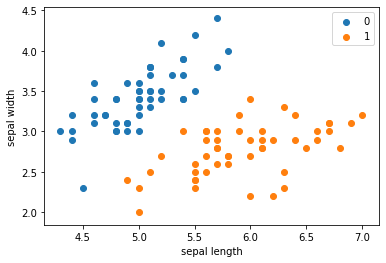

In [4]:
plt.scatter(df[:50]['sepal length'], df[:50]['sepal width'], label='0')
plt.scatter(df[50:100]['sepal length'], df[50:100]['sepal width'], label='1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

In [5]:
data = np.array(df.iloc[:100, [0,1,-1]])

In [6]:
X, y = data[:,:-1], data[:,-1]

In [7]:
y = np.array([1 if i==1 else -1 for i in y])

## Perceptron

In [8]:
class Model:
    def __init__(self):
        self.w = np.ones(len(data[0])-1, dtype = np.float32)
        self.b = 0
        self.l_rate = 0.1
        
    def sign(self, x, w, b):
        y = np.dot(x, w) +b
        return y
    
    def fit(self, X_train, y_train):
        is_wrong = False
        while not is_wrong:
            wrong_count = 0
            for d in range(len(X_train)):
                X = X_train[d]
                y = y_train[d]
                if y* self.sign(X, self.w, self.b)<=0:
                    self.w = self.w + self.l_rate * np.dot(y, X)
                    self.b = self.b + self.l_rate * y
                    wrong_count += 1
            if wrong_count == 0:
                is_wrong = True
        return 'Perceptron Model1'
    
    def score(self):
        pass

In [9]:
perceptron = Model()
perceptron.fit(X, y)

'Perceptron Model1'

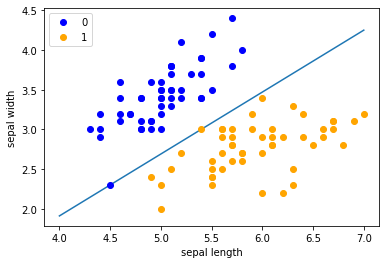

In [10]:
x_points = np.linspace(4, 7, 10)
y_ = -(perceptron.w[0] * x_points + perceptron.b) / perceptron.w[1]
plt.plot(x_points, y_)

plt.plot(data[:50, 0], data[:50, 1], 'bo', color='blue', label='0')
plt.plot(data[50:100, 0], data[50:100, 1], 'bo', color='orange', label='1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

## scikit-learn 实例

In [11]:
import sklearn
from sklearn.linear_model import Perceptron

In [12]:
sklearn.__version__

'0.21.3'

In [13]:
clf = Perceptron(fit_intercept = True,
                max_iter = 1000,
                shuffle = True)
clf.fit(X, y)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [14]:
# Weights assigned to the features.
print(clf.coef_)

[[ 23.2 -38.7]]


In [15]:
# Constants in decision function.
print(clf.intercept_)

[-5.]


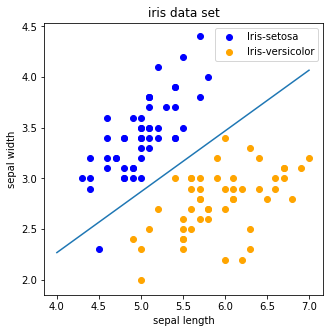

In [17]:
plt.figure(figsize = (5, 5))

plt.title('iris data set')

plt.scatter(data[:50,0], data[:50,1], c='b', label = 'Iris-setosa')
plt.scatter(data[50:100,0], data[50:100, 1], c='orange', label = 'Iris-versicolor')

x_points = np.arange(4, 8)
y_ = -(clf.coef_[0][0]*x_points + clf.intercept_[0])/clf.coef_[0][1]
plt.plot(x_points, y_)

plt.legend()
plt.grid(False)
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

**Attention:**
In the figure above, there is a blue point in the lower left corner that is not correctly classified. This is because Sklearn's Perceptron instance has a **tol** parameter.

The tol parameter specifieds that if the difference between the loss of this iteration and the loss of the previous iteration is less than a specific value, the iteration is stopped. So we need to set tol = None so that it can continue to iterate:

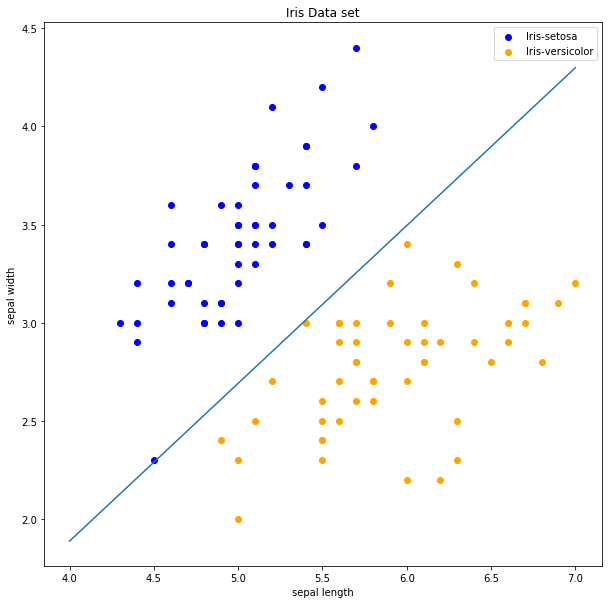

In [18]:
clf = Perceptron(fit_intercept=True, 
                 max_iter=1000,
                 tol=None,
                 shuffle=True)
clf.fit(X, y)

plt.figure(figsize=(10,10))

plt.title('Iris Data set')

plt.scatter(data[:50, 0], data[:50, 1], c='b', label='Iris-setosa',)
plt.scatter(data[50:100, 0], data[50:100, 1], c='orange', label='Iris-versicolor')

x_ponits = np.arange(4, 8)
y_ = -(clf.coef_[0][0]*x_ponits + clf.intercept_)/clf.coef_[0][1]
plt.plot(x_ponits, y_)

plt.legend()
plt.grid(False)
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()